# Сборный проект 1

## Описание проекта

Сборный проект 1 — это итоговая работа, в которой объединились все полученные знания и навыки в области анализа данных и машинного обучения. В рамках проекта была решена реальная задача, основанная на реальных данных. Используемые методы включают обработку данных, анализ, визуализацию, а также построение и оценку моделей машинного обучения.

Проект состоит из нескольких ключевых этапов:

    1) Предобработка данных: Работа с пропущенными значениями, создание новых признаков, нормализация и масштабирование данных.

    2) Анализ данных: Применение статистических методов для выявления важных зависимостей и закономерностей.

    3) Моделирование: Построение и настройка моделей машинного обучения для решения задачи. Тестирование различных моделей с целью выбора наилучшей.

    4) Оценка модели: Оценка качества модели с использованием различных метрик, таких как точность, F1-метрика и другие.

В рамках проекта использовались данные, которые были обработаны и очищены для дальнейшего анализа. Весь процесс работы на протяжении проекта был задокументирован в Jupyter Notebook, что позволяет наглядно проследить весь процесс работы с данными и моделями.

## Цель проекта
Целью проекта было применить знания, полученные на курсе, в реальной задаче. Необходимо было решить задачу с помощью машинного обучения и оценить качество модели на основе тестовых данных. Основной акцент был сделан на подготовку данных, правильный выбор модели и настройку гиперпараметров для достижения наилучших результатов.

## Практическая направленность
Сборный проект позволяет применить навыки, полученные в ходе обучения, для решения реальной задачи, связанной с анализом данных и машинным обучением. Результаты работы могут быть использованы для получения ценной информации для бизнеса или научных исследований, а также для дальнейшего улучшения моделей в реальных приложениях.

## Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Импортируем необходимые библиотеки и знакомимся с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


в данных есть нули, нужно будет придумать что с ними делать, Critic_Score можно для удобства перевести в int, также переведем все названия столбцов в нижний регистр.

In [5]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

в столбце с оценками пользоваетелей встречается значние "tbd" - to be defined, видимо это означает, что игра еще не была оценена или ей не хватает оценок для публикации результата. Фактически оно является пропуском 

## Подготовка данных

### Переведем названия столбцов в нижний регистр

In [6]:
data = data.rename(columns=str.lower)

In [7]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### обработка пропусков

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

в столбце name мало пропусков и без названия невозможно определить, что за игра и поэтому дальше от таких строк не будет смысла, можно удалить это 2 строки.

year_of_release содержит уже 269 пропусков, это не мало поэтому удалять строки с этими нулями не следует, год выпуска не является чем-то очень важным для нашей задачи, по этому можем оставить эти строки как есть.

critic_score содержит уже огромное количество пропусков, более 50%, их ни в коем случае нельзя удалять, но и заменять медианой или средней нам не подойдет, обозначи все нули за значение -1 (такое значение точно ни с чем не спутается и мы будем понимать, что это пропуск), возможно раньше было не так много критиков игр

user_score, аналогично с critic_score, но тут еще присутсвует tbd, тоже обозначим его за -1, для нас он равен пропуску, возможно раньше было не так популярно оценивать игры 

rating - рейтинг от организации ESRB, тоже очень много пропусков, возможно эта организация раньше была не так популярна и далеко не всем играм присваивался ее рейтинг, обозначим пропуски значением "pass"

In [9]:
data[['critic_score', "user_score"]] = data[['critic_score', "user_score"]].fillna(-1)
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1
data['rating'] = data['rating'].fillna('pass')
data = data[~data['year_of_release'].isna()]

In [10]:
data.isna().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Преобразуемый типы данных

In [11]:
data['user_score'] = data['user_score'].astype('float')
data['critic_score'] = data['critic_score'].astype('int')

data['year_of_release'] = data['year_of_release'].astype('int')

/tmp/ipykernel_93/786853239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = data['user_score'].astype('float')
/tmp/ipykernel_93/786853239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['critic_score'] = data['critic_score'].astype('int')
/tmp/ipykernel_93/786853239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


теперь все типы данных в порядке

### Добавим новый столбец с суммарными продажами

In [13]:
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

/tmp/ipykernel_93/914649822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [14]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,pass,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,pass,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,pass,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,pass,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,pass,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1.0,pass,0.01


### проверим данные на наличие дубликатов

In [15]:
data.duplicated().sum()

0

явных дубликатов необнаружено

In [16]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83,5.5,E,2.56
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1.0,pass,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1.0,pass,0.03
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83,5.5,E,0.01


есть две игры с одинаковыми названиями, платформами и датами выпуска очевидно это одни и те же игры, но данные о них по ошибке разбиты на две строки 

In [17]:
data = data.groupby(['name', 'platform','year_of_release', 'genre', 'rating'],  dropna=False).sum().reset_index()

In [18]:
data[data[['name', 'platform','year_of_release', 'genre', 'rating']].duplicated(keep=False)].count()

name               0
platform           0
year_of_release    0
genre              0
rating             0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
sum_sales          0
dtype: int64

теперь все в порядке

В ходе подготовки данных перевели все названия столбцов в нижний регистр для более удобной работы с ними, также перевели все значения в необходимый тип данных, избавились от дубликатов и разобрались с нулями, теперь можно переходить к исследовательскому анализу данных

## Исследовательский анализ данных

### сколько игр выпускалось в разные годы

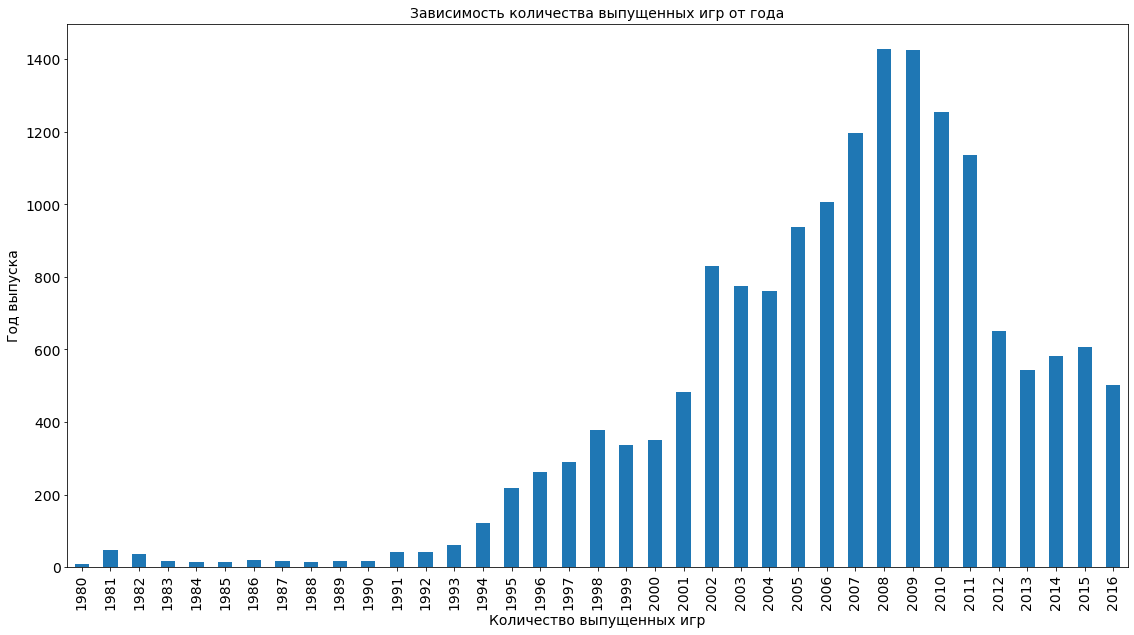

In [19]:
data['year_of_release'].value_counts().sort_index().plot(kind = 'bar', figsize = (19,10), fontsize = 14);
plt.xlabel('Количество выпущенных игр', fontsize = 14);
plt.ylabel('Год выпуска', fontsize = 14);
plt.title('Зависимость количества выпущенных игр от года', fontsize = 14);

до 1995 года было совсем небольшое количество выпускаемых игр, возможно это связано с развитием технологий, самый пик наблюдается в 2008 - 2009 году. Дальше пошел спад, который возомжно связан со сложностью разработки новых игр

### Как менялись продажи по платформам

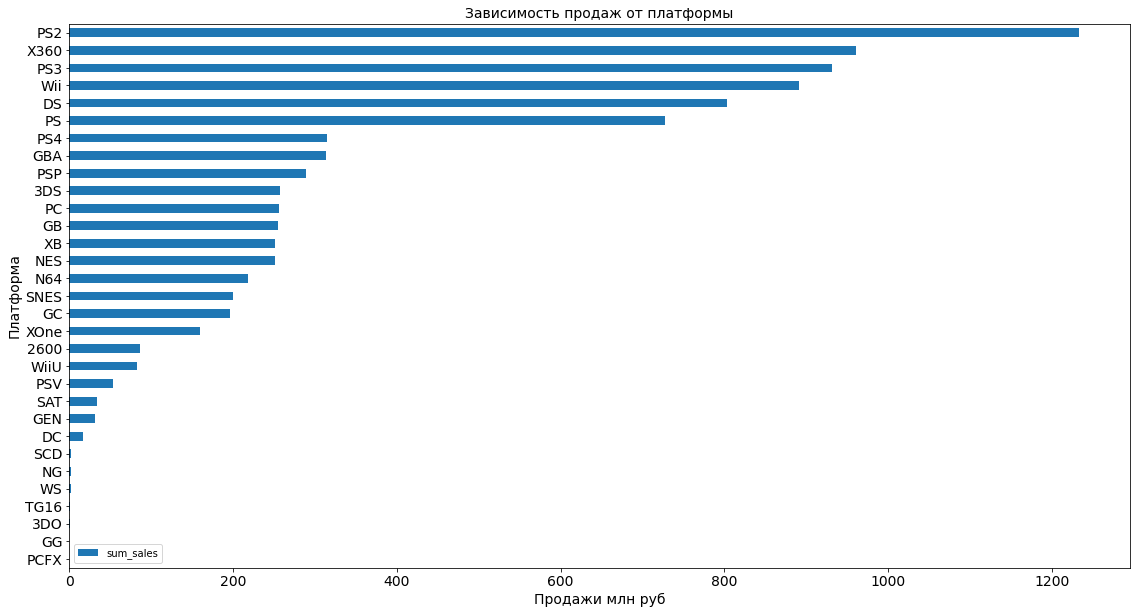

In [20]:
data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values('sum_sales')\
.plot(kind = 'barh', figsize = (19,10), fontsize = 14);
plt.xlabel('Продажи млн руб', fontsize = 14);
plt.ylabel('Платформа', fontsize = 14);
plt.title('Зависимость продаж от платформы', fontsize = 14);

самое больше количество продаж было на PS2, так как это очень известная игровая приставка, в низу находятся совсем неизвестные названия, следовательно у них минимальные продажи

возьмем топ 5 консолей и посмотрим на распределение продаж по годам 

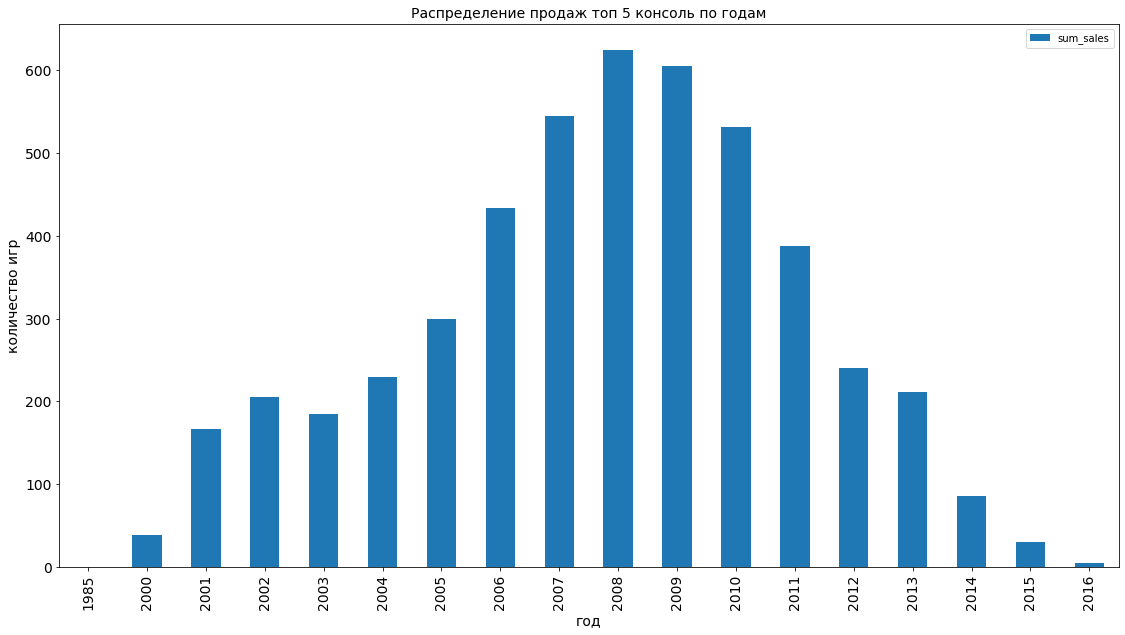

In [21]:
data[data['platform'].isin(['PS2', 'X360', 'Wii', 'PS3', 'DS'])]\
.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')\
.plot(kind = 'bar', figsize = (19,10), fontsize = 14);
plt.xlabel('год', fontsize = 14);
plt.ylabel('количество игр', fontsize = 14);
plt.title('Распределение продаж топ 5 консоль по годам', fontsize = 14);

странно что на графике присутсвует 1985 год, посмотрим что это за топовая игровая приставка, на которой выпускались игры еще в 1985 года

In [22]:
data[(data['platform'].isin(['PS2', 'X360', 'Wii', 'PS3', 'DS'])) & (data['year_of_release'] == 1985)] 

,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
13129,Strongest Tokyo University Shogi DS,DS,1985,Action,pass,0.0,0.0,0.02,0.0,-1,-1.0,0.02


In [23]:
data[data['platform'] == 'DS'].sort_values('year_of_release')

,name,platform,year_of_release,genre,rating,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
13129,Strongest Tokyo University Shogi DS,DS,1985,Action,pass,0.00,0.00,0.02,0.00,-1,-1.0,0.02
8730,Mr. Driller: Drill Spirits,DS,2004,Puzzle,E,0.08,0.00,0.05,0.01,70,8.9,0.14
4459,Feel the Magic XY/XX,DS,2004,Puzzle,T,0.17,0.00,0.10,0.02,75,8.1,0.29
2595,Daigasso! Band Brothers,DS,2004,Misc,pass,0.00,0.00,0.19,0.00,-1,-1.0,0.19
7686,Madden NFL 2005,DS,2004,Sports,E,0.24,0.00,0.00,0.02,68,7.7,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...
3243,Disney's Planes,DS,2013,Simulation,E,0.11,0.08,0.00,0.02,-1,-1.0,0.21
13901,The Croods: Prehistoric Party!,DS,2013,Misc,pass,0.03,0.04,0.00,0.01,-1,-1.0,0.08
14391,The Smurfs 2,DS,2013,Platform,E,0.00,0.17,0.00,0.01,-1,-1.0,0.18
7077,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,E10+,0.00,0.03,0.00,0.00,-1,-1.0,0.03


странно на платформе DS не выпускались игры почти 20 лет, это явно какая то ошибка и в 1985 году не могло существовать этой платформы, удалим эту строку

In [24]:
data = data[~((data['platform'] == 'DS') & (data['year_of_release'] == 1985))]

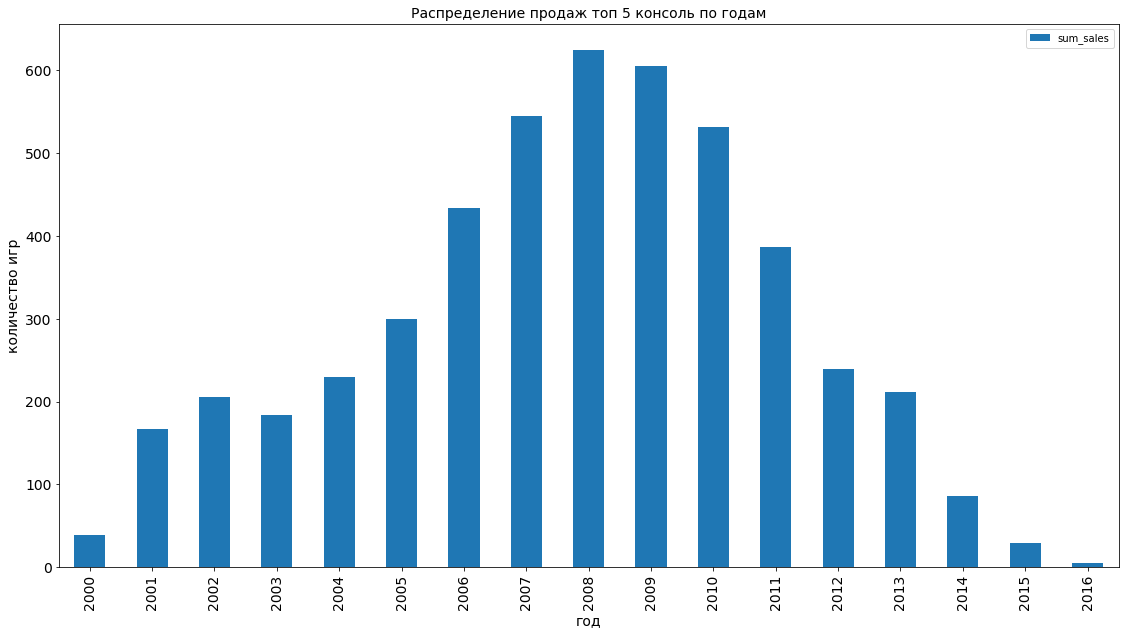

In [25]:
data[data['platform'].isin(['PS2', 'X360', 'Wii', 'PS3', 'DS'])]\
.pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')\
.plot(kind = 'bar', figsize = (19,10), fontsize = 14);
plt.xlabel('год', fontsize = 14);
plt.ylabel('количество игр', fontsize = 14);
plt.title('Распределение продаж топ 5 консоль по годам', fontsize = 14);

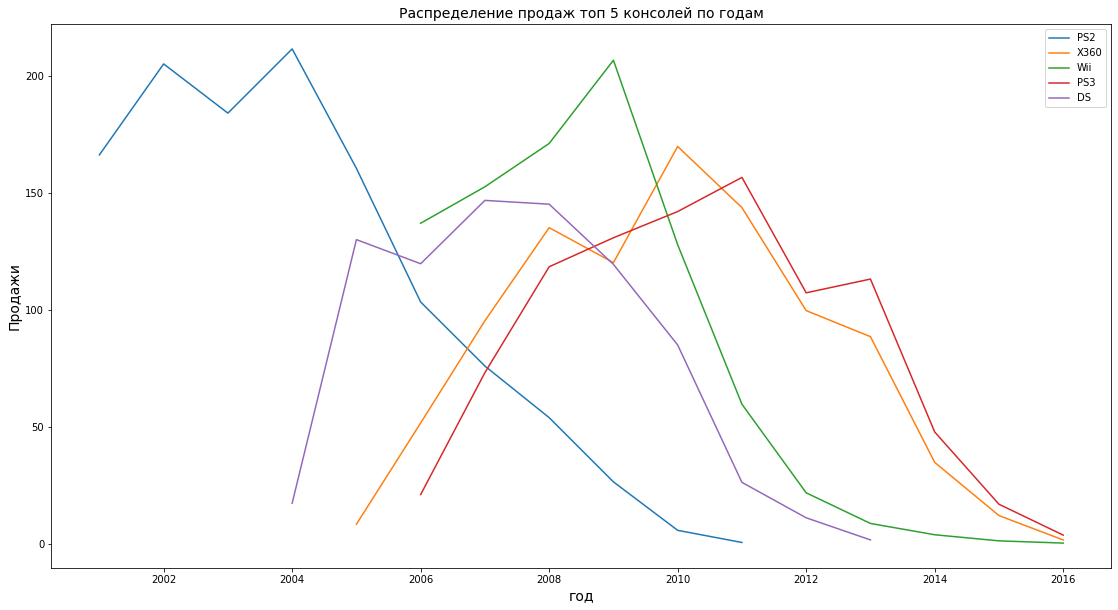

In [26]:
platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS']
plt.figure(figsize=(19,10))
for i in platforms:
    plt.plot(data[(data['platform'] == i) & (data['year_of_release'] > 2000)]\
             .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum'))
plt.legend(('PS2', 'X360', 'Wii', 'PS3', 'DS'))
plt.xlabel('год', fontsize = 14);
plt.ylabel('Продажи', fontsize = 14);
plt.title('Распределение продаж топ 5 консолей по годам', fontsize = 14);
plt.show()

по графикам видно, что время жизни консоли в среднем 9 лет и после этого ее популярность сходит на нет. А пика своей популярности игровая приставка достигает примерно за 2-4 года.

Дальше возьмем данные за 2013 - 2016 год а все остальное отбросим, ведь в такой сильно меняющейся индустрии нет смысла смотреть назад дальше чем на 2-3 года

In [27]:
new_data = data[(data['year_of_release'] > 2013) | (data['year_of_release'].isna())]

### Какие платформы лидируют по продажам c 2013 года

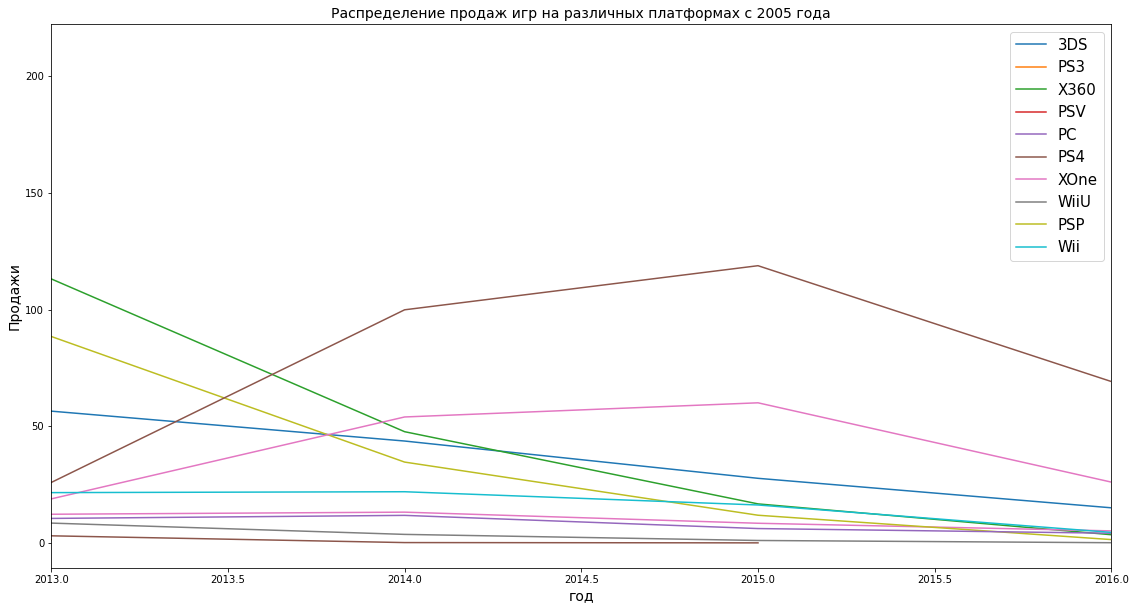

In [28]:
platforms = data['platform'].unique()
plt.figure(figsize=(19,10))
for i in platforms:
    plt.plot(data[(data['platform'] == i) ]\
             .pivot_table(index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum'))
plt.legend(data[data['year_of_release'] > 2013]['platform'].unique(), fontsize=15)
plt.xlim((2013, 2016))
plt.xlabel('год', fontsize = 14);
plt.ylabel('Продажи', fontsize = 14);
plt.title('Распределение продаж игр на различных платформах с 2005 года', fontsize = 14);
plt.show()

In [29]:
data[data['year_of_release'] == 2016].pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')\
.sort_values('sum_sales').tail(3)

,sum_sales
platform,
3DS,15.14
XOne,26.15
PS4,69.25


топ 3 платформы по суммарным продажам к концу 2016 года: 3DS XOne PS4, но даже они являясь лидерами, сильно падают, судя по этому можно сказать, что в целом на конец 2016 года продажи игр падают.

### «ящик с усами» по глобальным продажам игр в разбивке по платформам

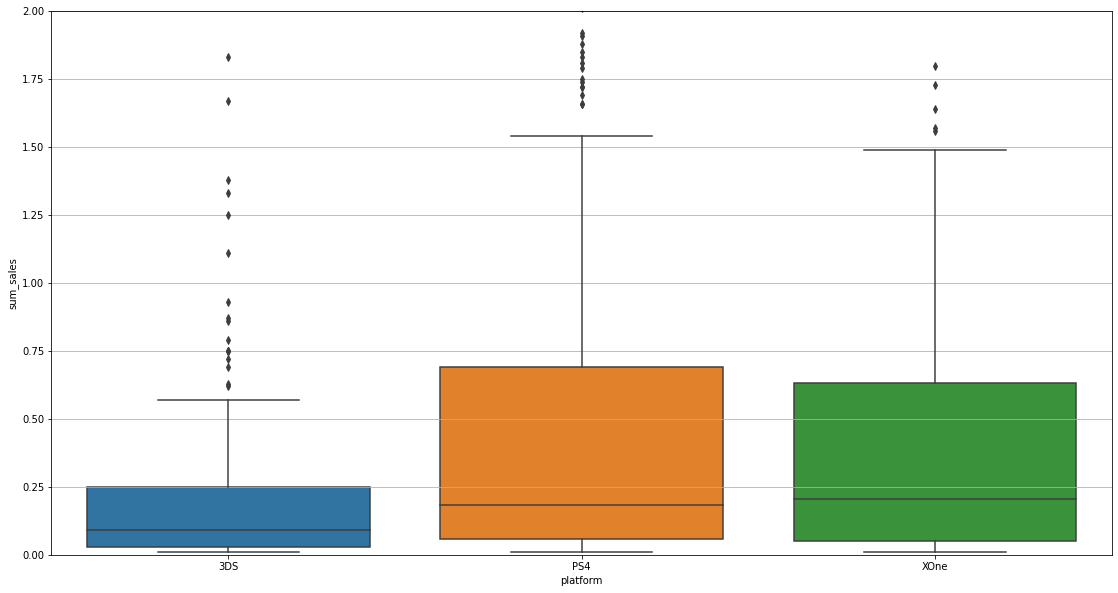

In [30]:
platforms = ['3DS', 'XOne', 'PS4']
plt.figure(figsize = (19,10))
plt.grid()
sns.boxplot(x='platform', y='sum_sales', data=new_data[new_data['platform'].isin(platforms)]).set(ylim=(0, 2));

In [31]:
new_data[new_data['platform'].isin(platforms)].groupby('platform')['sum_sales'].median()

platform
3DS     0.090
PS4     0.185
XOne    0.205
Name: sum_sales, dtype: float64

мидианы 3DS, PS4 и XOne соответственно равны 0.09, 0.185 и 0.205 , границы нормальных значений у PS4 и XOne лежат в районе 1.5, а у 3DS в районе 0.6

### Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков

Возьмем за самую популярную платформу PS4, которая показывала наилучший результат продаж под конец 2016 года

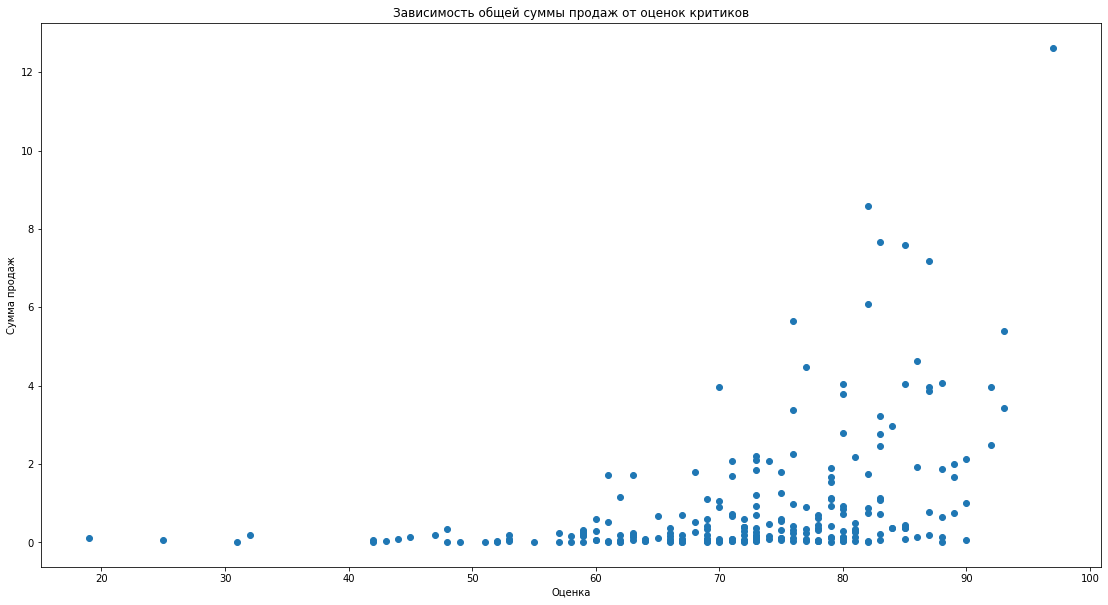

In [32]:
plt.figure(figsize = (19,10))
plt.scatter(x = new_data[(new_data['platform'] == 'PS4') & (new_data['critic_score'] > 0)]['critic_score'], \
            y = new_data[(new_data['platform'] == 'PS4') & (new_data['critic_score'] > 0)]['sum_sales'])
plt.title('Зависимость общей суммы продаж от оценок критиков')
plt.xlabel('Оценка')
plt.ylabel('Сумма продаж')
plt.show()

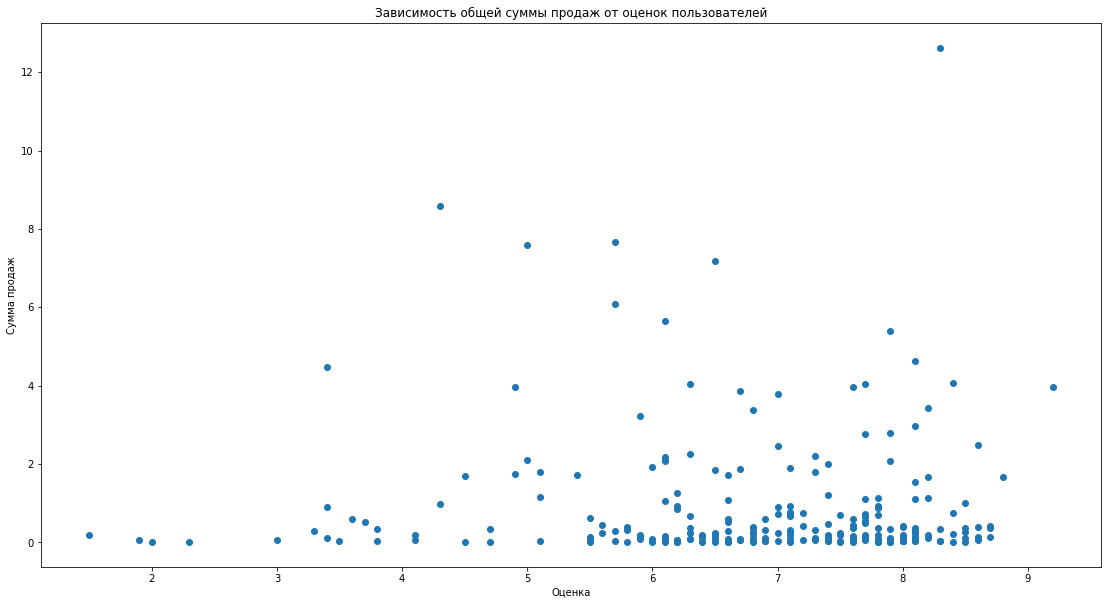

In [33]:
plt.figure(figsize = (19,10))
plt.scatter(x = new_data[(new_data['platform'] == 'PS4') & (new_data['user_score'] > 0)]['user_score'], \
            y = new_data[(new_data['platform'] == 'PS4') & (new_data['user_score'] > 0)]['sum_sales'])
plt.title('Зависимость общей суммы продаж от оценок пользователей')
plt.xlabel('Оценка')
plt.ylabel('Сумма продаж')
plt.show()

<AxesSubplot:>

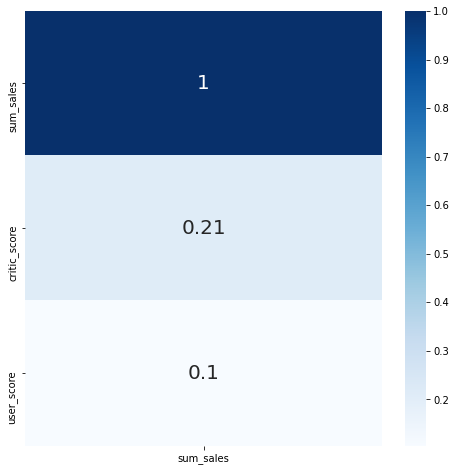

In [34]:
plt.figure(figsize = (8,8))
sns.heatmap(new_data[(new_data['platform'] == 'PS4')]\
            [['sum_sales','critic_score', 'user_score']]\
            .corr()[['sum_sales']], annot=True, cmap="Blues",annot_kws={"size": 20})

видно что в обоих случаях средняя сумарная прибыль растет с ростом оценок, но на оценках пользователей наблюдается больше выбросов, возможно это связано с тем, что обычные пользователи не совсем объективно оценивают игры, а может и с тем, что они покупают игры от проверенного разработчика, но игра не оправдывает их завышенных ожиданий, по корреляции видно, что на суммарную прибыль сильнее влияет оценка критиков, оценка пользователей влияет сильно меньше и в целом можно понять, что это не самые главные показатели, судя по низким значениям корреляции, скорее всего это связано с тем, что покупатели в последнюю очередь смотрят на оценку, ориентируясь на свое мнение 

посмотрим на другие платформы

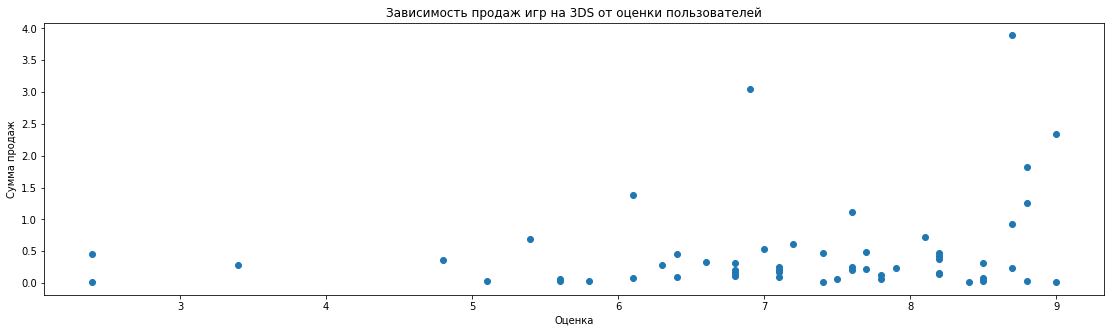

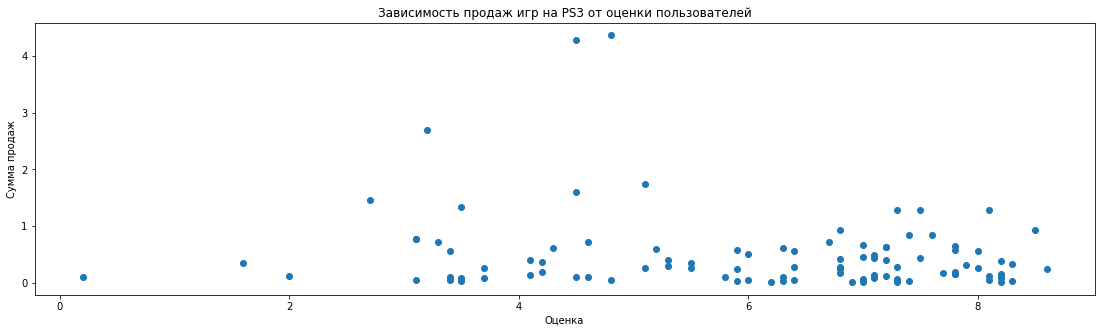

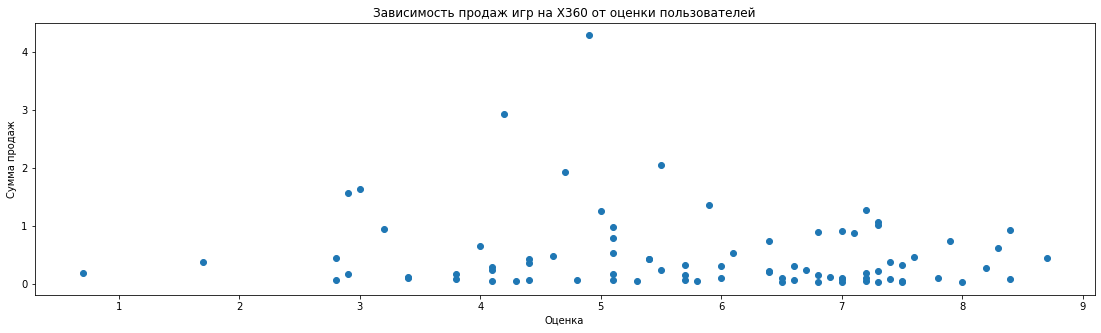

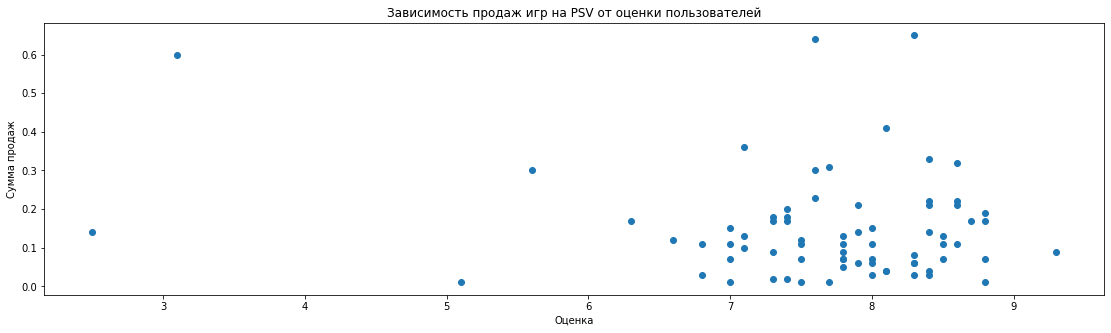

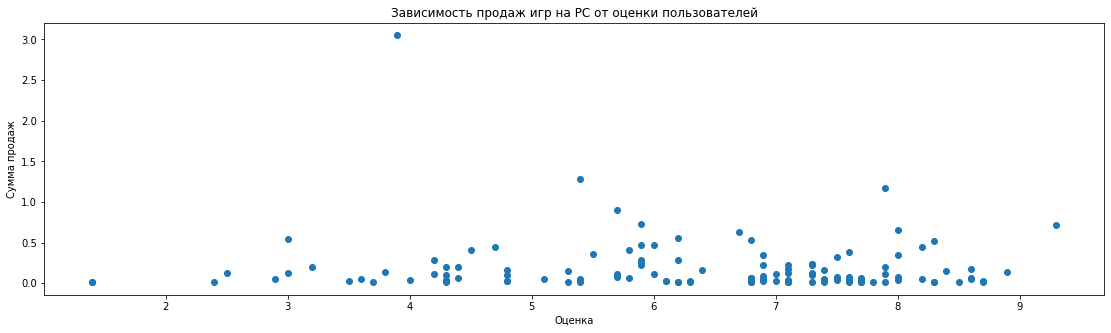

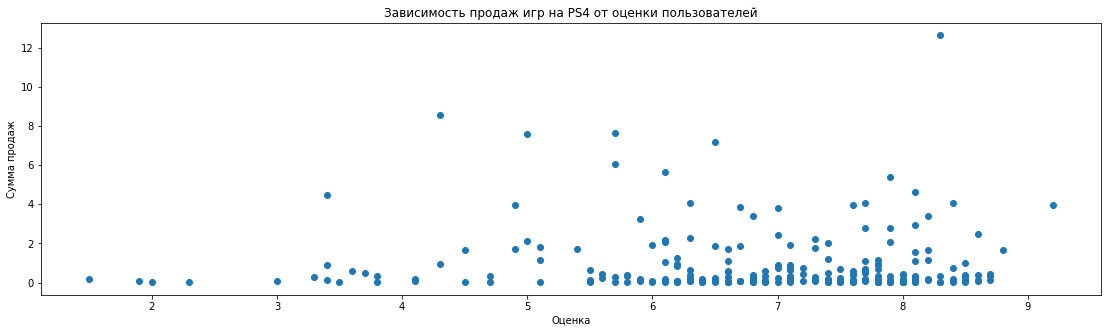

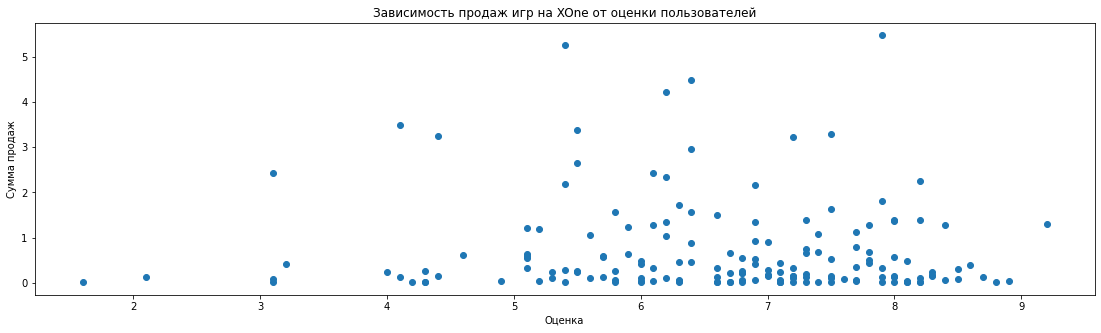

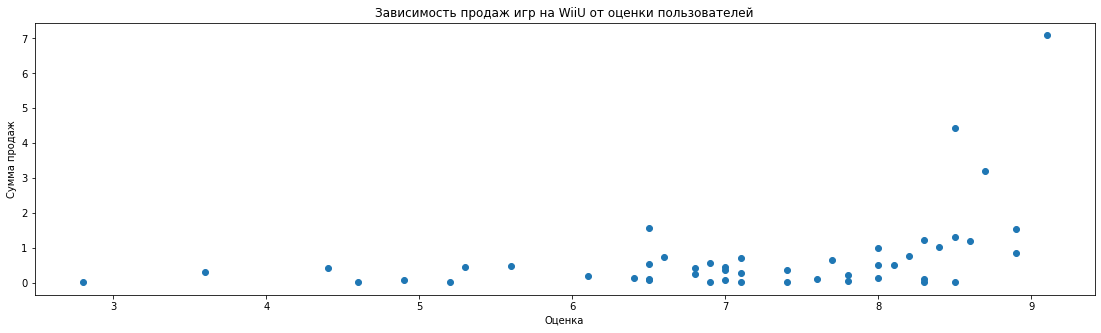

In [35]:
platforms = new_data['platform'].unique()
for i in platforms[:-2]:
    plt.figure(figsize = (19,5))
    plt.scatter(x = new_data[(new_data['platform'] == i) & (new_data['user_score'] > 0)]['user_score'],\
                y= new_data[(new_data['platform'] == i) & (new_data['user_score'] > 0)]['sum_sales'])
    plt.title('Зависимость продаж игр на {0} от оценки пользователей'.format(i))
    plt.xlabel('Оценка')
    plt.ylabel('Сумма продаж')
    plt.show()

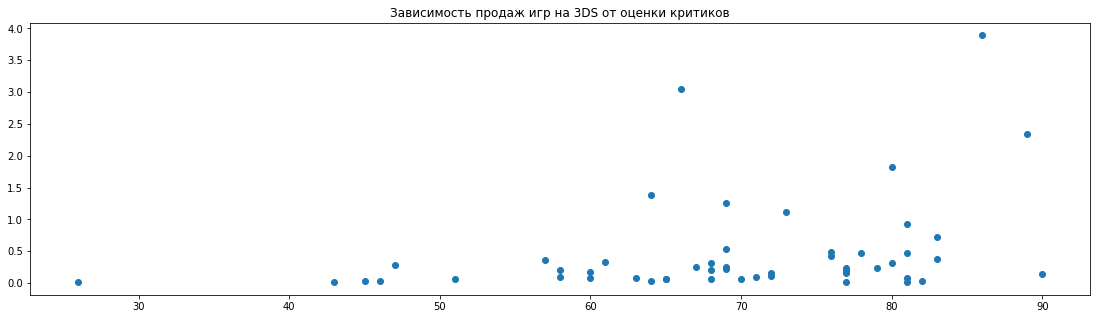

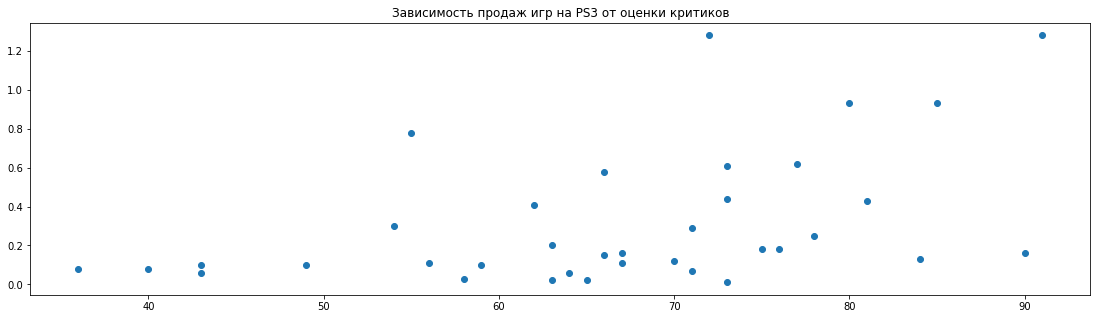

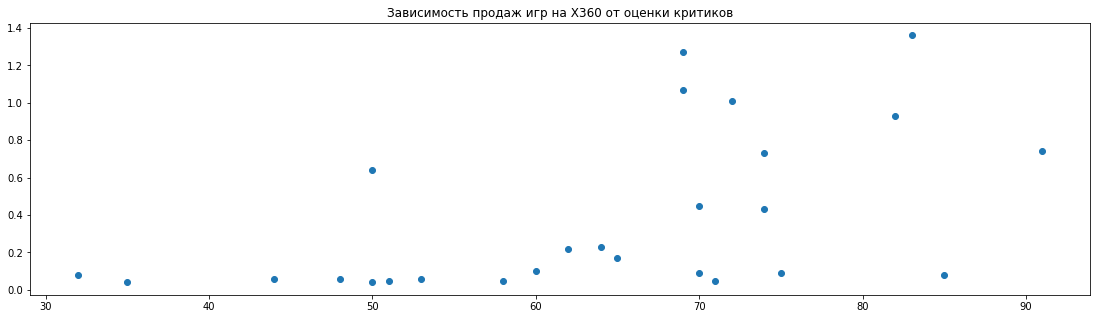

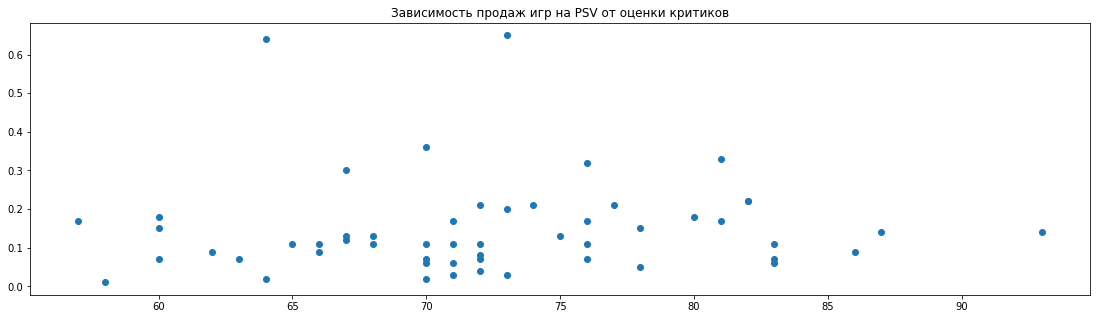

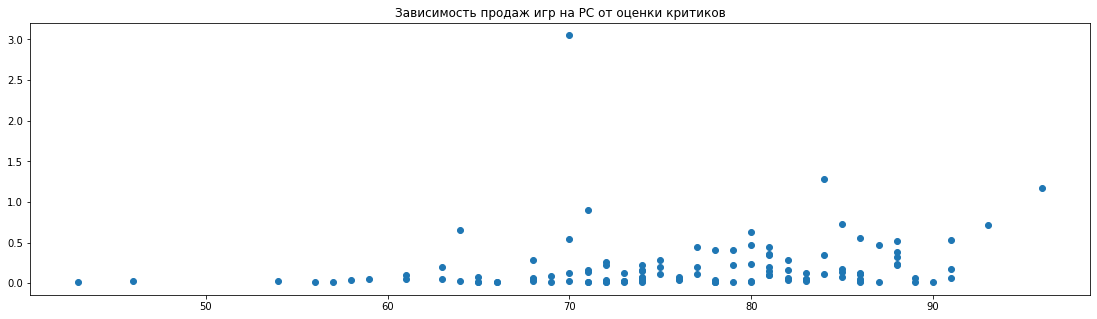

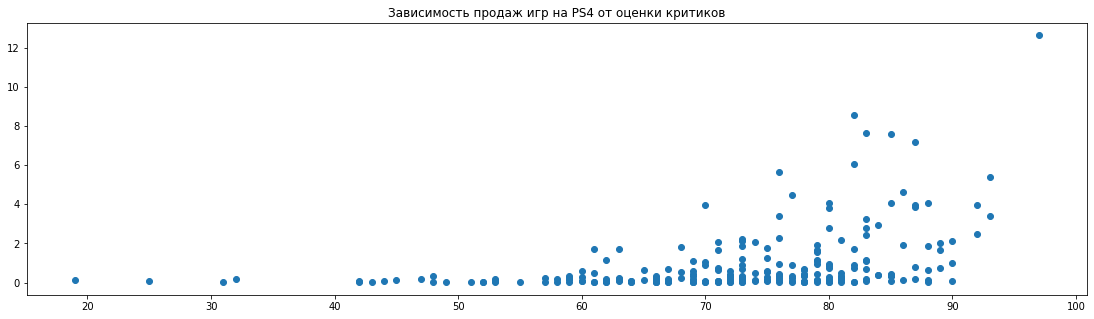

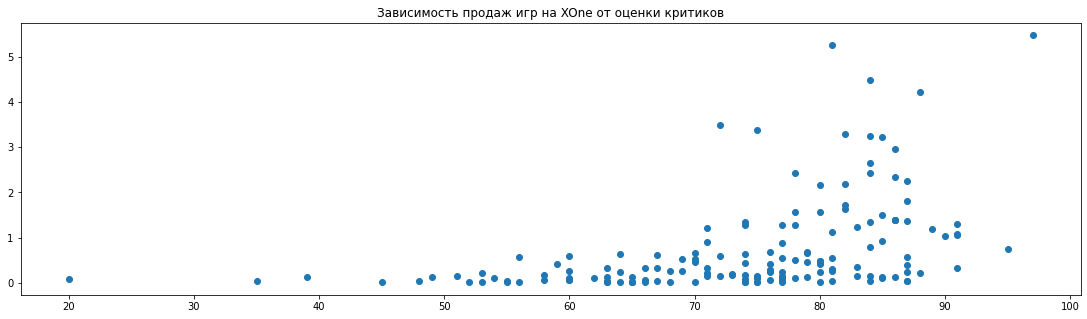

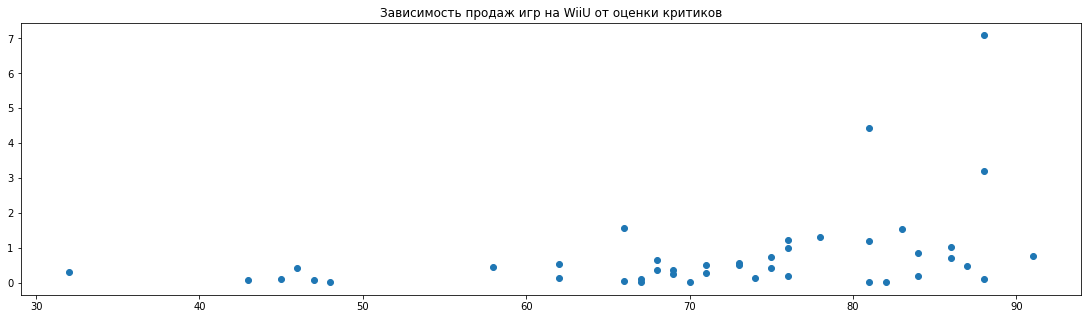

In [36]:
platforms = new_data['platform'].unique()
for i in platforms[:-2]:
    plt.figure(figsize = (19,5))
    plt.scatter(x = new_data[(new_data['platform'] == i) & (new_data['critic_score'] > 0)]['critic_score'],\
                y= new_data[(new_data['platform'] == i) & (new_data['critic_score'] > 0)]['sum_sales'])
    plt.title('Зависимость продаж игр на {0} от оценки критиков'.format(i))
    plt.show()

в целом наблюдается то же самое, чем выше оценка пользователей или критиков тем выше продажи, но в случае с оценками пользователей, выбросов больше, значит не всегда игра принесет меньше денег если отзывы пользователи средние, видимо оценка критиков является более весомой

### Распределение игр по жанрам

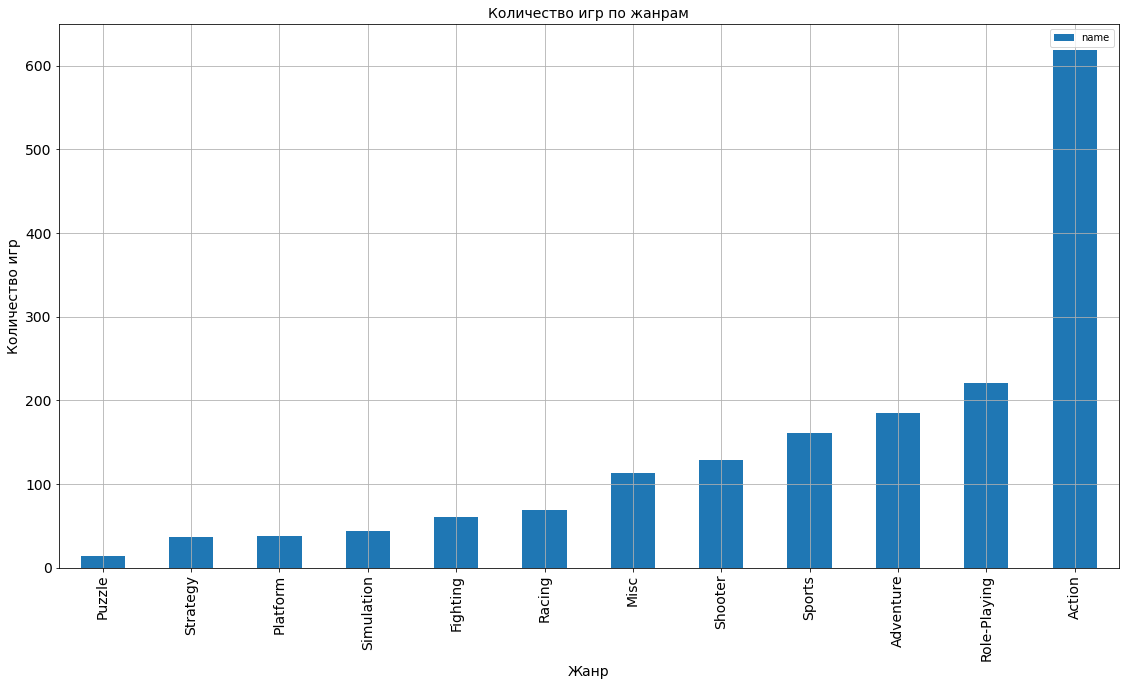

In [37]:
new_data.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').reset_index().sort_values('name')\
.plot(x = 'genre', kind = 'bar', figsize = (19,10), fontsize = 14)
plt.title('Количество игр по жанрам', fontsize = 14)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Количество игр', fontsize = 14)
plt.grid()
plt.show()

самым популярным по количеству выпущенных игр является жанр Action, а самым непопулярным является жанр Puzzle

Посмотрим на средние продажи по жанрам

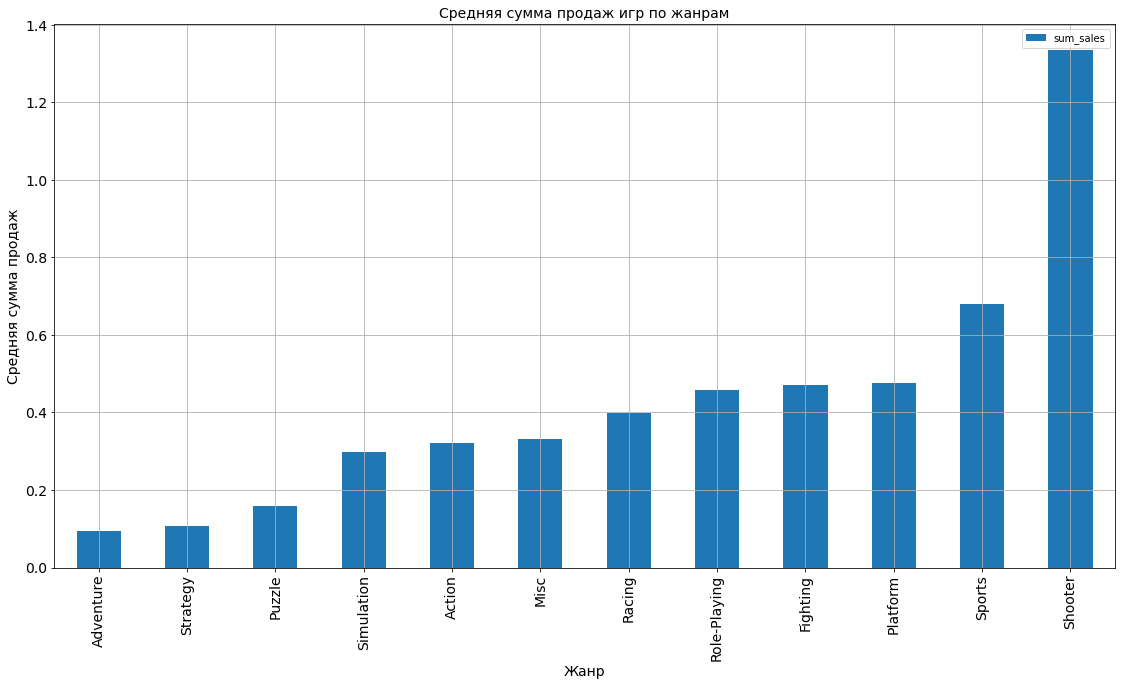

In [38]:
new_data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'mean').reset_index().sort_values('sum_sales')\
.plot(x = 'genre', kind = 'bar', figsize = (19,10), fontsize = 14)
plt.title('Средняя сумма продаж игр по жанрам', fontsize = 14)
plt.xlabel('Жанр', fontsize = 14)
plt.ylabel('Средняя сумма продаж', fontsize = 14)
plt.grid()
plt.show()

судя по средним суммам продаж, можно сказать, что самым прибыльным жанром будет являеться шутер, в среднем в игры в этом жанре приносят до 1.4 млн, что логично, эти игры не так сложны в разработке и ориентированы на людей, которые не ждут чего то особенного от шутера. Самыми низкими средними продажами обладает жанр приключений, в среднем он приносит 0.1 млн, вероятно это связано с тем, что игры подобного жанра создаются очень сложно, в них много мелочей и очень легко не угодить игрокам

## Портрет пользователя каждого региона

### самые популярные платформы по регионам

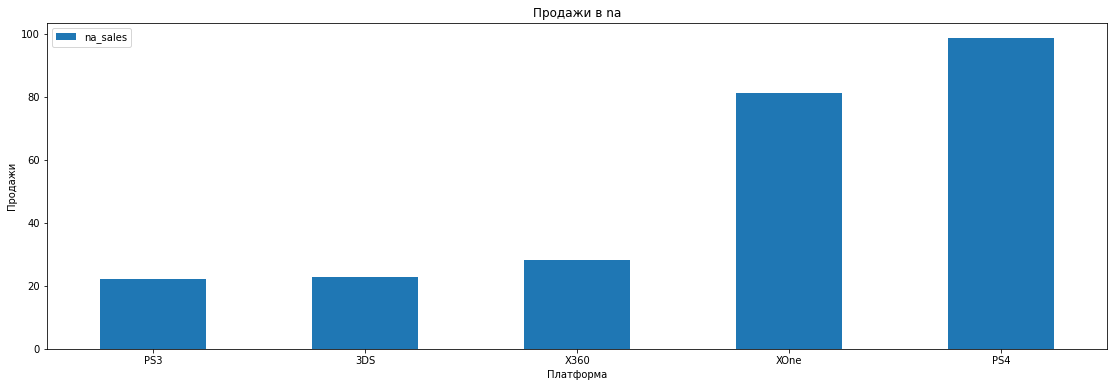

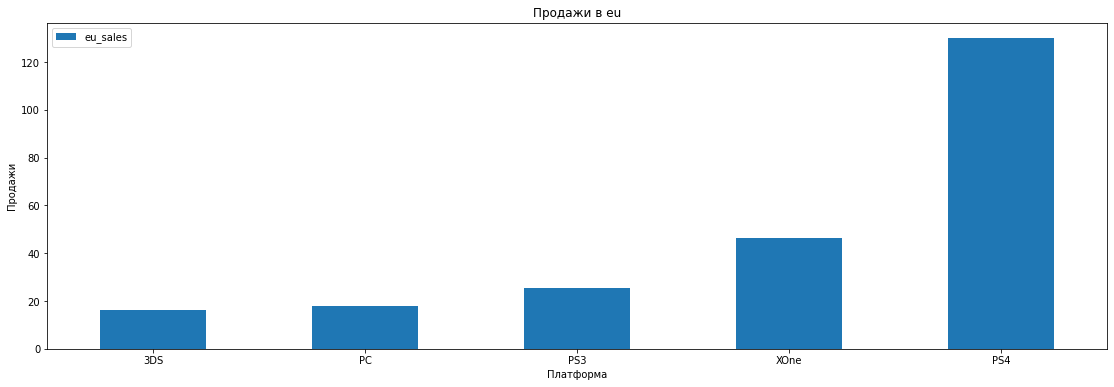

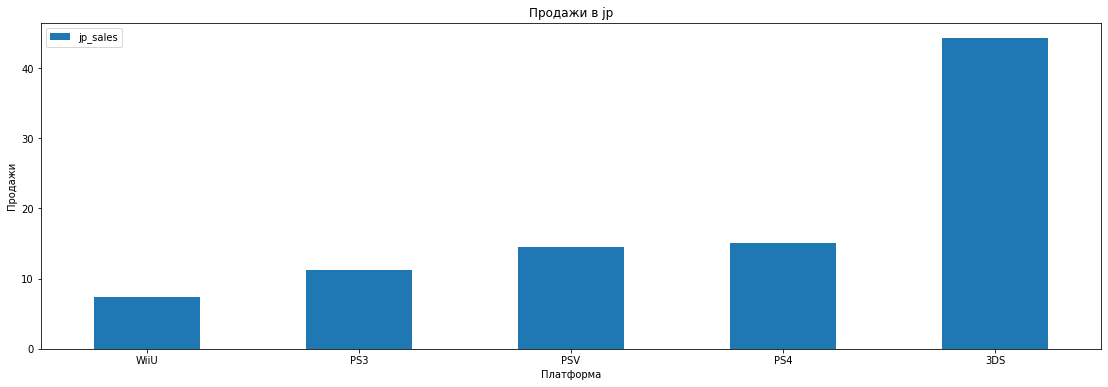

In [39]:
values = ['na_sales', 'eu_sales', 'jp_sales']
for i in values:
    new_data.pivot_table(index = 'platform', values = i, aggfunc = 'sum').sort_values(i).tail(5)\
    .plot(kind = 'bar', figsize = (19,6))
    plt.title('Продажи в '+  i[:2])
    plt.xticks(rotation=0)
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.show()

в Америке и Европе самой популярной платформой является PS4, в Китае 3DS, а самые непопулярные соответственно, PS3, 3DS и WiiU, да и в целом Америка похожа на Европу, в отличии от Китая, у которого на первом месте, самая непопулярная в других регионах платформа

### самые популярные жанры по регионам

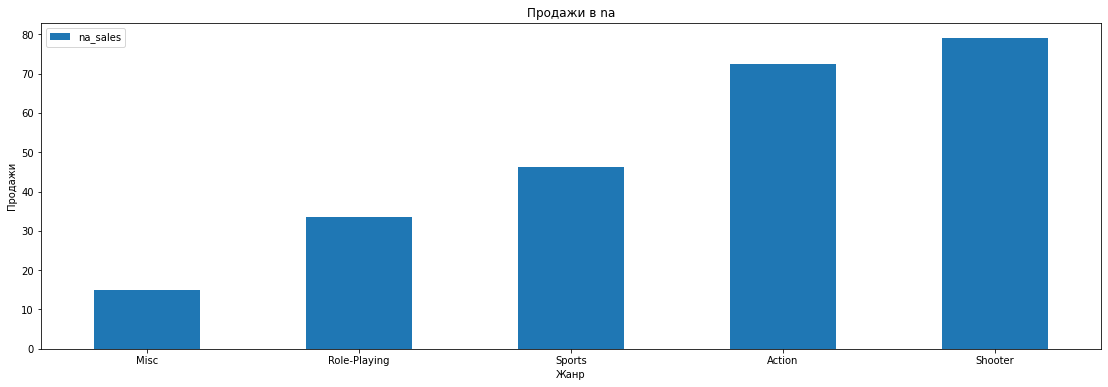

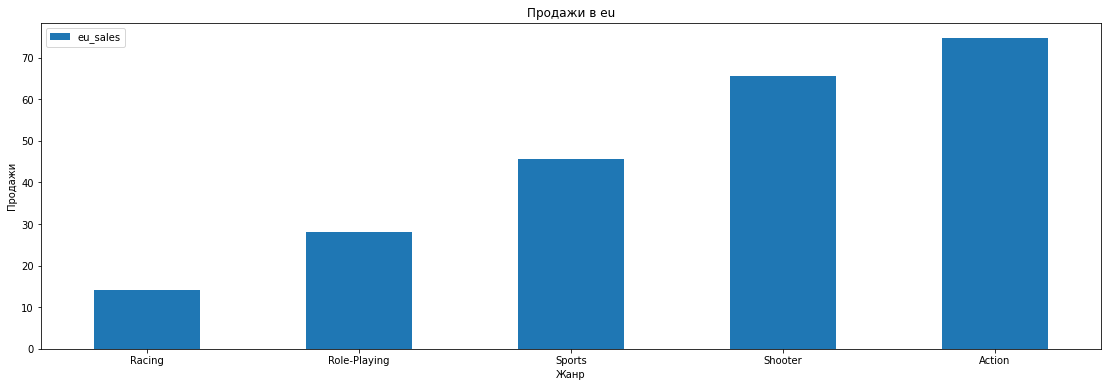

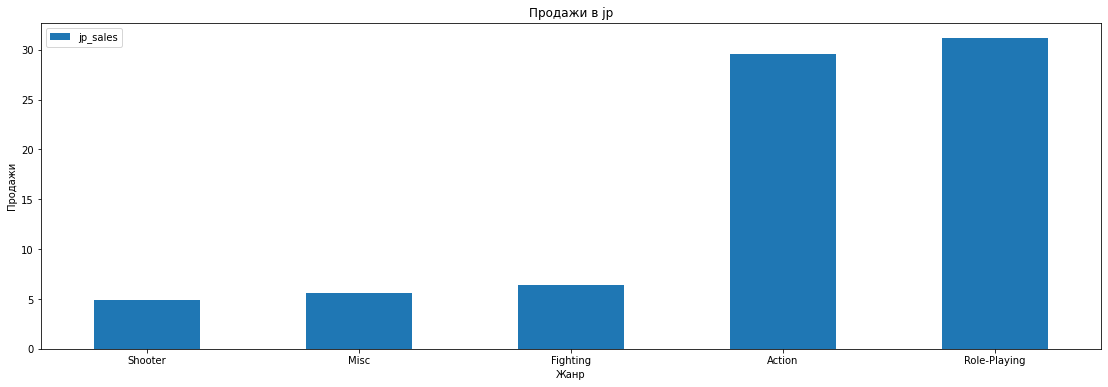

In [40]:
values = ['na_sales', 'eu_sales', 'jp_sales']
for i in values:
    new_data.pivot_table(index = 'genre', values = i, aggfunc = 'sum').sort_values(i).tail(5)\
    .plot(kind = 'bar', figsize = (19,6))
    plt.title('Продажи в '+  i[:2])
    plt.xticks(rotation=0)
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.show()

У Америки и Европы самые популярные жанры- Экшен и Шутер,в то время как в Японии шутер это самый непопулярный жанр, в Японии самый популярный жанр это Ролевые игры, которые в Америке являются наоборот самым непопулярным, в Европе самый непопулярный - Гонки, да и в целом интересы в Америке и Европе схожи, в отличии от Японии

### Влияние рейтинга ESRB на продажи в отдельном регионе

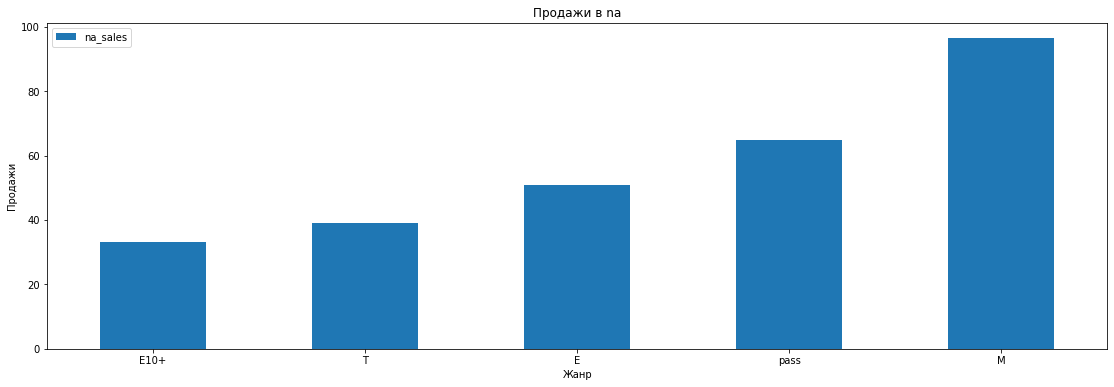

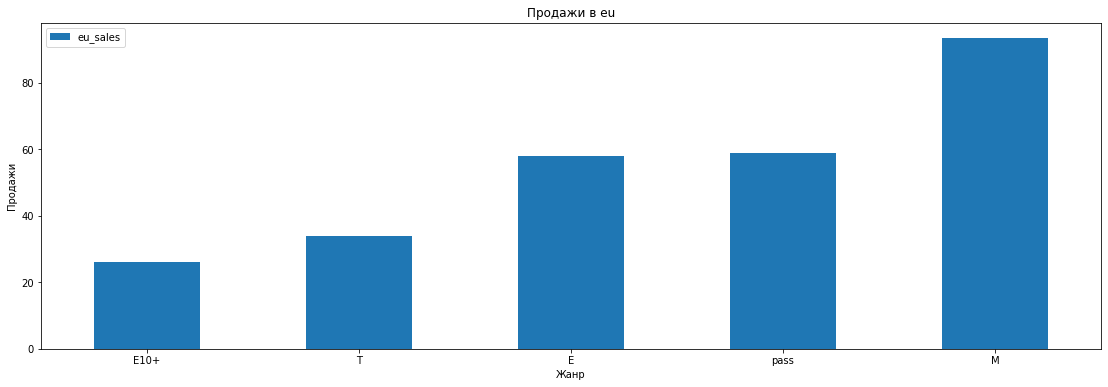

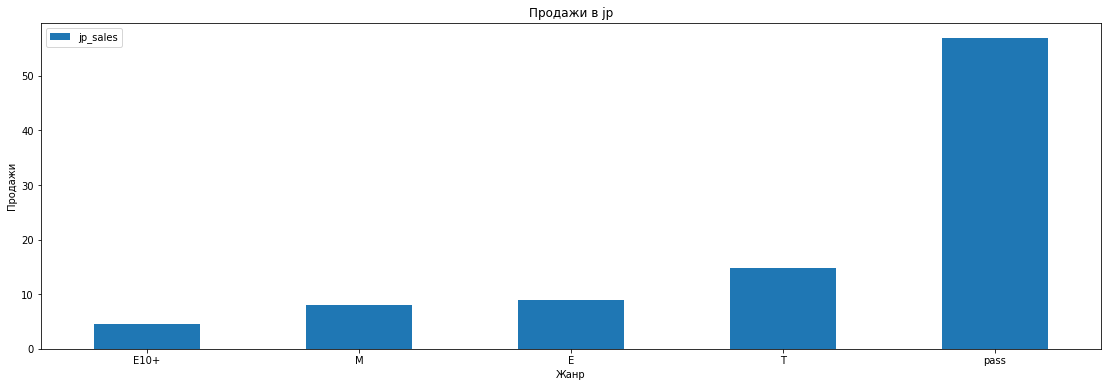

In [41]:
values = ['na_sales', 'eu_sales', 'jp_sales']
for i in values:
    new_data.pivot_table(index = 'rating', values = i, aggfunc = 'sum').sort_values(i).tail(5)\
    .plot(kind = 'bar', figsize = (19,6))
    plt.title('Продажи в '+  i[:2])
    plt.xticks(rotation=0)
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.show()

В Америке и Европе самым популярным рейтингом является М (17+), а вот в японии у большинства игр нет рейтинга ESRB, видимо этот рейтинг не применяется в Японии, поэтому этот рейтинг не совсем подходит для данного региона, но все таки если на него обращать внимание это будет рейтинг T(13+)

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

нулеваая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

альтернативная гипотеза: Средние пользователские рейтинги платформ Xbox One и PC различны

In [42]:
alpha = 0.05 

results = st.ttest_ind(new_data[(new_data['platform'] == 'PC') & (new_data['user_score'] > 0)]['user_score']\
                       , new_data[(new_data['platform'] == 'XOne')  & (new_data['user_score'] > 0)]['user_score'])

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Не отвергаем нулевую гипотезу


In [43]:
print('Средние пользовательские рейтинги для Xbox One: ',\
      new_data[(new_data['platform'] == 'XOne') & (new_data['user_score'] > 0)]['user_score'].mean())

print('Средние пользовательские рейтинги для PC: ',\
      new_data[(new_data['platform'] == 'PC')  & (new_data['user_score'] > 0)]['user_score'].mean())

Средние пользовательские рейтинги для Xbox One:  6.594545454545454
Средние пользовательские рейтинги для PC:  6.298360655737705


Средние пользовательские рейтинги платформ отличаются друг от друга 

### Средние пользовательские рейтинги жанров Action и Sports разные.

нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны

альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

In [44]:
alpha = 0.05 

results = st.ttest_ind(new_data[(new_data['genre'] == 'Action') & (new_data['user_score'] > 0)]['user_score']\
                       , new_data[(new_data['genre'] == 'Sports')  & (new_data['user_score'] > 0)]['user_score'])

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


In [45]:
print('Средние пользовательские рейтинги для Экшен жанра: ',\
      new_data[(new_data['genre'] == 'Action') & (new_data['user_score'] > 0)]['user_score'].mean())

print('Средние пользовательские рейтинги для Шутер жанра: ',\
      new_data[(new_data['genre'] == 'Sports')  & (new_data['user_score'] > 0)]['user_score'].mean())

Средние пользовательские рейтинги для Экшен жанра:  6.760606060606061
Средние пользовательские рейтинги для Шутер жанра:  5.2251968503937


 Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

Судя по продажам на различных платформах на 2016 год, если выпустить игру на 3DS, XOne или PS4, но также важно обратить внимание на регион, на который планируется сделать аспект, если это Япония то лучше выпускать на 3DS так как там она является более популярной, а в Америке и Европе наоборот более популярными будут XOne или PS4, но лучшие продажи в Америке и Европе все равно показывает PS4.

Также стоит обратить внимание на такие жанры как: Шутер или Экшен - Для Европы и Америки; Ролевые игры - для Японии, если игра будет в этих жанрах компания добьется максимальной прибыли в соответствующих регионах

Также стоит обратить внимание на оценки критиков, нежели на оценки пользователей, ведь они оказывают наибольший вклад в итоговый доход

Предпочтительный рейтинг ESRB для Америки и Европы - M, Для Японии - T





